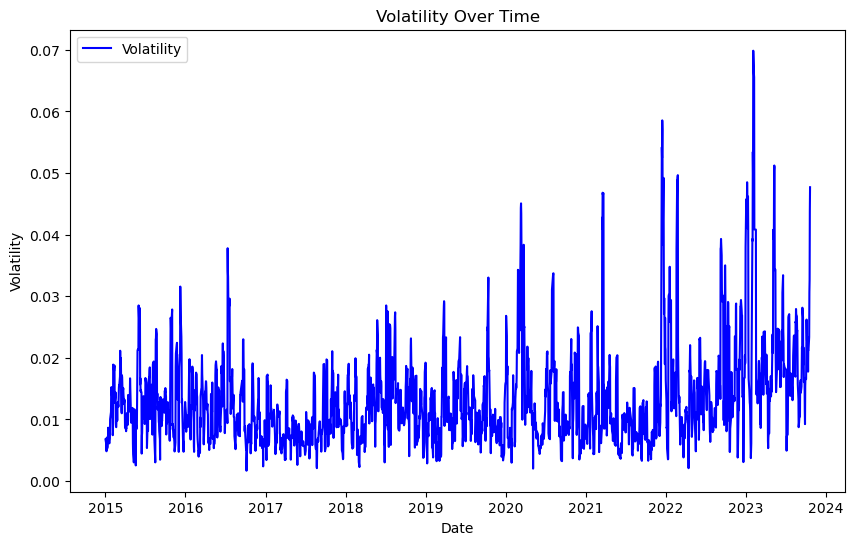

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('economist_with_sentmentV11.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Calculate rolling volatility (e.g., 20-day rolling standard deviation)
df['volatility'] = df['Returns'].rolling(window=5).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['volatility'], label='Volatility', color='blue')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [20]:
df.to_csv("Volatiliy.csv", index = False)

In [23]:
df.to_csv("Volatiliy10.csv", index = False)

In [25]:
df.to_csv("Volatiliy5.csv", index = False)

In [16]:
pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/d3/e7/e2d21cd3374abfffeae80e23fb164ba35515e2b63a5d1a545a23f71ac343/arch-6.2.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/922.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/922.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/922.8 kB 325.1 kB/s eta 0:00:03
   - ------------------------------------- 30.7/922.8 kB 325.1 kB/s eta 0:00:03
   -- ------------------------------------ 61.4/922.8 kB 328.2 kB/s eta 0:00:03
   --- ----------------------------------- 81.9/922.8 kB 381.3 kB/s eta 0:00:03
   --- ----------------------------------- 92.2/922.8 kB 374.1 kB/s eta 0:00:03
   ---- --------------------------------- 112.6/922.8 kB 409.6 kB/s eta 0:00:02
   ----- -------------------------------- 143.4/922.8 kB 425.3 kB/s eta 0:00:02
   ------ ------------------------------- 163.8/922.8 kB 446.5 kB/s eta 0:00:02
   -------- ---

In [7]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [8]:
df.head()

,Publication,Date,Returns,Price,Open,High,Low,Vol.,Change %,econTsentiment,...,econAdverbtsentiment,econStoptsentiment,econBigtsentiment,econUnigtsentiment,econTrigtsentiment,SimAverageSent,volatility,year,month,day
0,The Economist,2023-10-26,0.0319,"7,662.05","7,516.50","7,741.33","7,384.45",4.03,3.19%,1,...,5,5,4,1,1,2.000000,NaN,2023,10,26
1,The Economist,2023-10-25,-0.0708,"7,424.97","8,035.83","8,084.44","7,424.97",3.57,-7.08%,1,...,5,5,2,1,2,1.954545,NaN,2023,10,25
2,The Economist,2023-10-24,0.0310,"7,990.42","7,797.07","8,014.81","7,765.50",4,3.10%,1,...,4,1,1,2,1,1.954545,NaN,2023,10,24
3,The Economist,2023-10-23,0.0319,"7,750.39","7,649.39","7,794.54","7,520.13",3.19,3.19%,1,...,4,1,1,2,1,2.000000,NaN,2023,10,23
4,The Economist,2023-10-20,-0.0333,"7,510.68","7,691.02","7,711.16","7,446.97",3.24,-3.33%,1,...,4,1,1,2,1,2.000000,NaN,2023,10,20


In [18]:
import pandas as pd
from arch import arch_model

returns = df['Returns']
# Try different p and q values and compare using information criteria
best_aic = float('inf')
best_model = None

for p in range(1, 8):
    for q in range(1, 8):
        model = arch_model(returns, vol='Garch', p=p, q=q)
        results = model.fit(disp='off')  # Set disp='off' to suppress output
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_model = (p, q, results)

print(f"Best Model: p={best_model[0]}, q={best_model[1]}, AIC={best_aic}")


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarn

C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarn

C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarn

Best Model: p=4, q=3, AIC=-12374.647500453393


C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarn

In [19]:

# Assuming returns is your financial time series data
model = arch_model(returns, vol='Garch', p=4, q=3)
results = model.fit()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 2239643.2850741306
Iteration:      2,   Func. Count:     28,   Neg. LLF: 1382.2090150104705
Iteration:      3,   Func. Count:     42,   Neg. LLF: -3445.665998644162
Iteration:      4,   Func. Count:     55,   Neg. LLF: 126220057.20953044
Iteration:      5,   Func. Count:     72,   Neg. LLF: 80195.04497344898
Iteration:      6,   Func. Count:     85,   Neg. LLF: 2435444715.681158
Iteration:      7,   Func. Count:    102,   Neg. LLF: -4271.296271525934
Iteration:      8,   Func. Count:    116,   Neg. LLF: -2170.860733027233
Iteration:      9,   Func. Count:    129,   Neg. LLF: -5476.185813478604
Iteration:     10,   Func. Count:    141,   Neg. LLF: 17979.02263208088
Iteration:     11,   Func. Count:    153,   Neg. LLF: -5829.655561733012
Iteration:     12,   Func. Count:    165,   Neg. LLF: -5986.069431443981
Iteration:     13,   Func. Count:    176,   Neg. LLF: -5914.531619743009
Iteration:     14,   Func. Count:    188,   Neg. LLF: 

C:\Users\HP\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [19]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b2/e4/30b53d839608d2212b97972a8516ba0c7e776ee1102eaa82624807b944cf/keras-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     ----------- ------------------------- 30.7/101.3 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 101.3/101.3 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/999.1 kB ? eta -:--:--
   ----- ---------------------------------- 143.4/999.1 kB 4.3 MB/s eta 0:00:01
   ----------- -------------

In [23]:
pip install --user tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential

Decision Tree Mean Squared Error: 0.0005


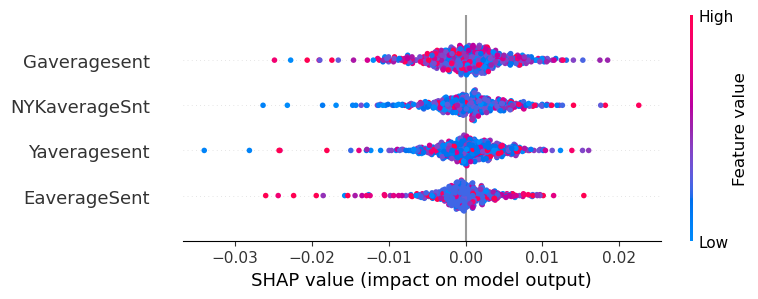

In [9]:
import shap
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('targetfull.csv')

# Drop rows with missing values
df = df.dropna()

# Define predictors and target variable
predictors = ['EaverageSent', 'Yaveragesent', 'Gaveragesent', 'NYKaverageSnt']
target_column = 'Returns'

# Extract predictors and target
X = df[predictors]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree for Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

print(f"Decision Tree Mean Squared Error: {dt_mse:.4f}")
# SHAP explainer
explainer_rf = shap.Explainer(dt_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values_rf, X_test, feature_names=predictors)

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming dt_model is your trained Decision Tree model
# X_test is your test set and y_test is the corresponding true labels
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

Decision Tree Accuracy: 0.5136


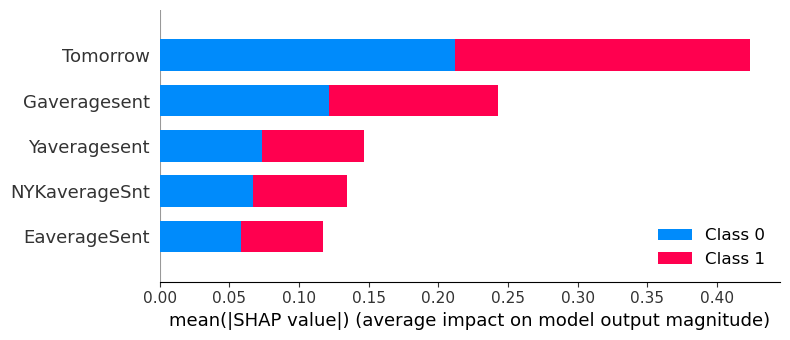

In [5]:
import shap
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('targetfull.csv')

# Define the relevant numeric columns
numeric_cols = ['EaverageSent', 'Yaveragesent', 'Gaveragesent','NYKaverageSnt',]

# Remove non-numeric characters and convert to numeric values
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Define predictors and target variable
predictors = ['EaverageSent', 'Yaveragesent', 'Gaveragesent','NYKaverageSnt']
target_column = 'Returns'

# Extract predictors and target
X = df[predictors]
y = df[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# SHAP explainer
explainer = shap.Explainer(dt_model)
shap_values = explainer.shap_values(X_test)

# Convert X_test to a DataFrame to ensure feature_names can be extracted
X_test_df = pd.DataFrame(X_test, columns=predictors)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test_df, feature_names=predictors)

Random Forest Mean Squared Error: 0.000275


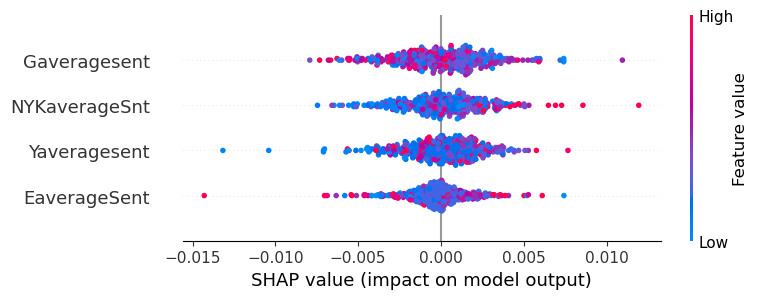

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with predictors and target variable

# Define predictors and target variable
predictors = ['EaverageSent', 'Yaveragesent', 'Gaveragesent', 'NYKaverageSnt']
target = 'Returns'

X = df[predictors].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
rf_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {mse:.6f}")

# SHAP explainer
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values_rf, X_test, feature_names=predictors)

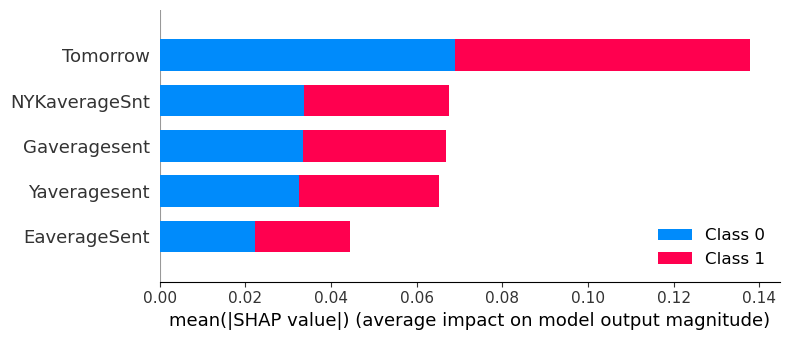

In [8]:
# SHAP explainer
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Convert X_test to a DataFrame to ensure feature_names can be extracted
X_test_df = pd.DataFrame(X_test, columns=predictors)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test_df, feature_names=predictors)

In [12]:
# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')

Logistic Regression Accuracy: 0.5339


In [12]:
df.describe

<bound method NDFrame.describe of             Date     Price     Open     High      Low     Vol  EaverageSent  \
4     10/20/2023  7,510.68  7691.02  7711.16  7446.97  3.2400      2.000000   
5     10/19/2023  7,769.03  7868.00  7971.39  7728.43  3.0900      2.272727   
6     10/18/2023  7,842.66  7964.63  8015.26  7836.99  2.9200      2.363636   
7     10/17/2023  8,115.01  7962.60  8115.01  7908.13  3.2800      2.090909   
8     10/16/2023  7,934.56  8228.49  8252.32  7926.64  3.5200      2.000000   
...          ...       ...      ...      ...      ...     ...           ...   
2207    1/9/2015    876.48   877.46   883.27   874.28  8.7428      2.000000   
2208    1/8/2015     876.9   874.05   879.19   872.60  8.7260      2.045455   
2209    1/7/2015    867.77   869.25   876.26   864.98  8.6498      2.045455   
2210    1/6/2015     869.1   866.51   869.12   855.75  8.5575      2.000000   
2211    1/5/2015    864.63   854.95   867.96   854.11  8.5411      2.000000   

      Yaveragesen

Logistic Regression Accuracy: 0.5339


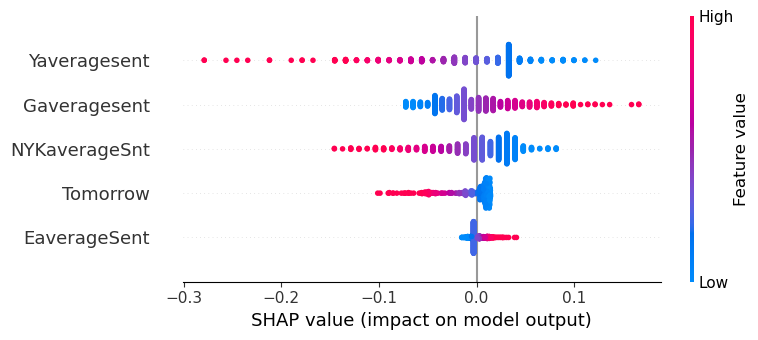

In [14]:
from sklearn.linear_model import LogisticRegression
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data and X_train, X_test, y_train, y_test
# ...

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')

# Use the Logistic explainer for Logistic Regression models
explainer = shap.Explainer(logreg_model, X_train)
shap_values = explainer.shap_values(X_test)

# Convert X_test to a DataFrame to ensure feature_names can be extracted
X_test_df = pd.DataFrame(X_test, columns=predictors)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test_df, feature_names=predictors)


14/14 [==============================] - 0s 3ms/step
Neural Network Mean Squared Error: 0.000378


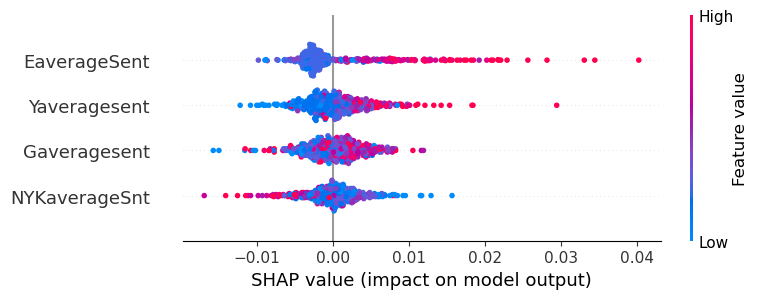

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with predictors and target variable

# Define predictors and target variable
predictors = ['EaverageSent', 'Yaveragesent', 'Gaveragesent', 'NYKaverageSnt']
target = 'Returns'

X = df[predictors].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict on the test set
nn_pred = model.predict(X_test).flatten()

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, nn_pred)
print(f"Neural Network Mean Squared Error: {mse_nn:.6f}")

# SHAP explainer
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_train))
shap_values = explainer(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=predictors)

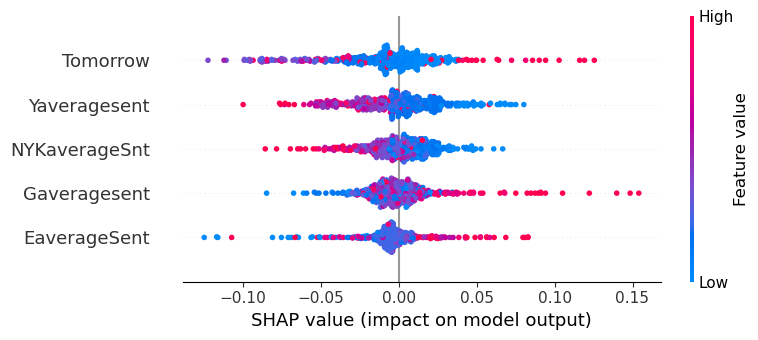

In [22]:
# SHAP explainer
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_train))
shap_values = explainer(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=predictors)

OLS Mean Squared Error: 0.0002


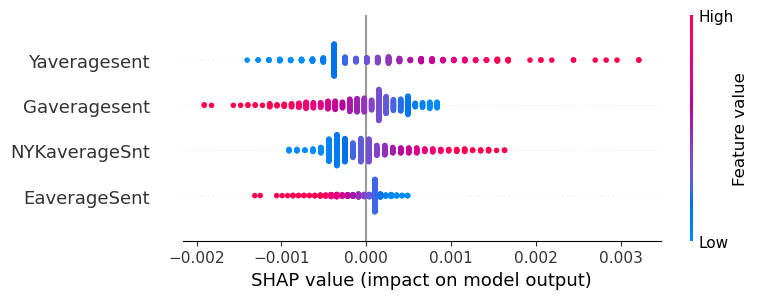

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are your training and testing sets
# Define the linear regression model
ols_model = LinearRegression()

# Train the model
ols_model.fit(X_train, y_train)

# Make predictions on the test set
ols_pred = ols_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ols_pred)

print(f"OLS Mean Squared Error: {mse:.4f}")
import shap

import shap

# Create a SHAP explainer for linear models
explainer_ols = shap.LinearExplainer(ols_model, X_train)

# Calculate SHAP values
shap_values_ols = explainer_ols.shap_values(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values_ols, X_test, feature_names=predictors)

SVM Accuracy: 0.5317


Using 1766 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/442 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from math import sqrt

# Assuming df is your DataFrame with predictors and target variable
# Define predictors and target variable
predictors = ['EaverageSent', 'Yaveragesent', 'Gaveragesent', 'NYKaverageSnt']
target = 'Returns'

X = df[predictors].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    rmse = sqrt(mse)
    
    return mse, mae, r2, evs, rmse

# Evaluate Linear Regression
lr_metrics = evaluate_model(lr_model, y_test, lr_pred)
print("Linear Regression Metrics:")
print(f"MSE: {lr_metrics[0]:.4f}")
print(f"MAE: {lr_metrics[1]:.4f}")
print(f"R2 Score: {lr_metrics[2]:.4f}")
print(f"Explained Variance: {lr_metrics[3]:.4f}")
print(f"RMSE: {lr_metrics[4]:.4f}")
print()

# Evaluate Decision Tree Regression
dt_metrics = evaluate_model(dt_model, y_test, dt_pred)
print("Decision Tree Regression Metrics:")
print(f"MSE: {dt_metrics[0]:.4f}")
print(f"MAE: {dt_metrics[1]:.4f}")
print(f"R2 Score: {dt_metrics[2]:.4f}")
print(f"Explained Variance: {dt_metrics[3]:.4f}")
print(f"RMSE: {dt_metrics[4]:.4f}")
print()

# Evaluate Random Forest Regression
rf_metrics = evaluate_model(rf_model, y_test, rf_pred)
print("Random Forest Regression Metrics:")
print(f"MSE: {rf_metrics[0]:.4f}")
print(f"MAE: {rf_metrics[1]:.4f}")
print(f"R2 Score: {rf_metrics[2]:.4f}")
print(f"Explained Variance: {rf_metrics[3]:.4f}")
print(f"RMSE: {rf_metrics[4]:.4f}")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict on the test set
nn_pred = model.predict(X_test).flatten()

# Evaluate Neural Network
nn_metrics = evaluate_model(model, y_test, nn_pred)
print("Neural Network Regression Metrics:")
print(f"MSE: {nn_metrics[0]:.4f}")
print(f"MAE: {nn_metrics[1]:.4f}")
print(f"R2 Score: {nn_metrics[2]:.4f}")
print(f"Explained Variance: {nn_metrics[3]:.4f}")
print(f"RMSE: {nn_metrics[4]:.4f}")

Linear Regression Metrics:
MSE: 0.0002
MAE: 0.0112
R2 Score: -0.0066
Explained Variance: -0.0056
RMSE: 0.0155

Decision Tree Regression Metrics:
MSE: 0.0005
MAE: 0.0168
R2 Score: -1.1479
Explained Variance: -1.1475
RMSE: 0.0226

Random Forest Regression Metrics:
MSE: 0.0003
MAE: 0.0121
R2 Score: -0.1522
Explained Variance: -0.1503
RMSE: 0.0166
14/14 [==============================] - 0s 910us/step
Neural Network Regression Metrics:
MSE: 0.0004
MAE: 0.0151
R2 Score: -0.6470
Explained Variance: -0.5690
RMSE: 0.0198


In [14]:
target_counts = df['target'].value_counts()

print("Class Distribution:")
print(target_counts)

Class Distribution:
target
0    1223
1     985
Name: count, dtype: int64


In [18]:
# Check the distribution of your target variable
print(df['target'].value_counts())

target
0    1223
1     985
Name: count, dtype: int64


In [27]:
feature_importance = dt_model.feature_importances_

In [30]:
pip install --user shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/4c/a4785425971e7433a7d80fa0ff9cd9f5f35303d4e99446190d91c72648c9/shap-0.44.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.44.0-cp311-cp311-win_amd64.whl.metadata (24 kB)
Using cached shap-0.44.0-cp311-cp311-win_amd64.whl (447 kB)
Note: you may need to restart the kernel to use updated packages.
